In [1]:
#Importing Libraries

from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import sem, t
lowess = sm.nonparametric.lowess
from scipy.stats import sem, t
from scipy.interpolate import interp1d # for interpolation of new data points
import statistics as stats
import math as math
%matplotlib inline

In [2]:
#Importing and Defining Data

data = pd.read_csv('PozaryO.csv')
data_extract_O = data['O']
data_extract_age = data['age']
data_extract_error = data['error']

O = data_extract_O.to_numpy()
Age = data_extract_age.to_numpy()
Error = data_extract_error.to_numpy()

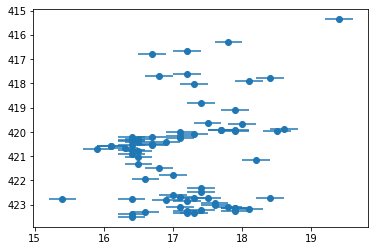

In [3]:
#Scatter Plot

plt.errorbar(O, Age, xerr=Error, fmt="o")
plt.gca().invert_yaxis()

In [4]:
#LOWESS

Olowess = lowess(O, Age, frac=0.6)

lowessdata = pd.DataFrame({'Age':Olowess[:,0],'LOWESS':Olowess[:,1]})

lowessdata

,Age,LOWESS
0,415.359639,17.784873
1,416.300648,17.682342
2,416.677052,17.640079
3,416.784596,17.627080
4,417.604618,17.510282
...,...,...
67,423.305000,17.372473
68,423.330000,17.378340
69,423.355000,17.384142
70,423.375000,17.388735


In [5]:
#LOWESS First Derivative

n = len(lowessdata)
        
#GTS 2020       
lowessfirstderiv = np.zeros(n)

for i in range(n):
    if i == 0:
        lowessfirstderiv[i] = np.NaN
    else:
        lowessfirstderiv[i] = (lowessdata['LOWESS'][i] - lowessdata['LOWESS'][i-1])/\
        (lowessdata['Age'][i-1] - lowessdata['Age'][i])
            
        
#Make dataframe
lowessfirstderivdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS 1D':lowessfirstderiv})

lowessfirstderivdata

,Age,LOWESS 1D
0,415.359639,NaN
1,416.300648,0.108959
2,416.677052,0.112282
3,416.784596,0.120872
4,417.604618,0.142433
...,...,...
67,423.305000,-0.237398
68,423.330000,-0.234667
69,423.355000,-0.232072
70,423.375000,-0.229659


In [6]:
#LOWESS Second Derivative

n = len(lowessdata)

lowesssecondderiv = np.zeros(n)

for i in range(n):
    if i == 0:
        lowesssecondderiv[i]=np.NaN
    else:
        lowesssecondderiv[i] = (lowessfirstderivdata['LOWESS 1D'][i] - lowessfirstderivdata['LOWESS 1D'][i-1])/\
        (lowessfirstderivdata['Age'][i] - lowessfirstderivdata['Age'][i-1])

#Make Data Frame
lowesssecondderivdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS 2D':lowesssecondderiv})

lowesssecondderivdata

,Age,LOWESS 2D
0,415.359639,NaN
1,416.300648,NaN
2,416.677052,0.008829
3,416.784596,0.079875
4,417.604618,0.026293
...,...,...
67,423.305000,0.078295
68,423.330000,0.109235
69,423.355000,0.103812
70,423.375000,0.120651


In [7]:
#Combine Data

lowessgradientdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS':lowessdata['LOWESS'],\
                              'LOWESS 1D': lowessfirstderiv,'LOWESS 2D':lowesssecondderiv})

lowessgradientdata

,Age,LOWESS,LOWESS 1D,LOWESS 2D
0,415.359639,17.784873,NaN,NaN
1,416.300648,17.682342,0.108959,NaN
2,416.677052,17.640079,0.112282,0.008829
3,416.784596,17.627080,0.120872,0.079875
4,417.604618,17.510282,0.142433,0.026293
...,...,...,...,...
67,423.305000,17.372473,-0.237398,0.078295
68,423.330000,17.378340,-0.234667,0.109235
69,423.355000,17.384142,-0.232072,0.103812
70,423.375000,17.388735,-0.229659,0.120651


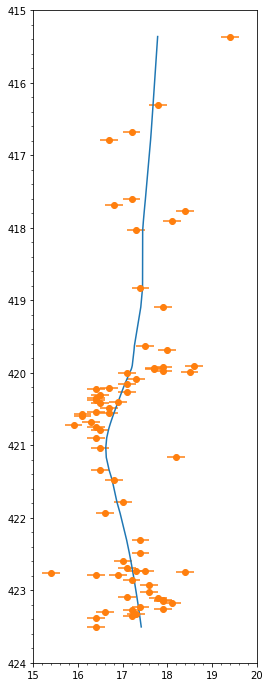

In [8]:
#Plot LOWESS and Data

xL = lowessgradientdata['LOWESS']
yL = lowessgradientdata['Age']
xO = O
yO = Age

fig, ax = plt.subplots(figsize=(4, 12))

ax.plot(xL,yL)
plt.errorbar(O, Age, xerr=Error, fmt="o")
plt.ylim([415, 424])
plt.xlim([15, 20])
ax.invert_yaxis()
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

plt.show()

fig.savefig('Pozary O LOWESS.svg')

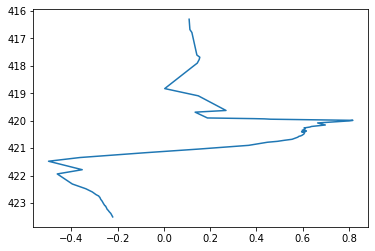

In [9]:
#Plot LOWESS first derivative

plt.plot(lowessgradientdata['LOWESS 1D'],lowessgradientdata['Age'])
plt.gca().invert_yaxis()

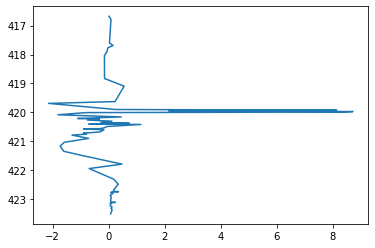

In [10]:
#Plot LOWESS second derivative

plt.plot(lowessgradientdata['LOWESS 2D'],lowessgradientdata['Age'])
plt.gca().invert_yaxis()

In [11]:
#Range

print('Minimum LOWESS 2D', lowessgradientdata['Age'][lowessgradientdata['LOWESS 2D'].idxmin()],'Ma')

span = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]

LOWESS_Inflection = [420.4,420.6,420.5,419.9,420.7,419.7,420.4,420.4,420.4,420.6,419.9,420.6]

inflection_range = pd.DataFrame({'Span':span,'LOWESS_Decrease':LOWESS_Inflection})

inflection_range

Minimum LOWESS 2D 419.6874081 Ma


,Span,LOWESS_Decrease
0,0.35,420.4
1,0.40,420.6
2,0.45,420.5
3,0.50,419.9
4,0.55,420.7
5,0.60,419.7
6,0.65,420.4
7,0.70,420.4
8,0.75,420.4
9,0.80,420.6


In [12]:
#Calculate Decrease CI

fi = LOWESS_Inflection

xi = stats.mean(fi)
si = np.std(fi)
mi = len(fi)
dfi = n-1
a95i = 2.179 #t value for 12 samples

CI95i = (si/math.sqrt(mi))*a95i

print('95% CI:',xi,'+/-',CI95i)
print(min(fi))
print(max(fi))
print(mi)

95% CI: 420.34166666666664 +/- 0.19634244583350277
419.7
420.7
12
